#1 We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. Task:

1. fitting it to the periodic function
2. plot the fit Data:
        Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
        Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0,0.5,'Min and max temperature')

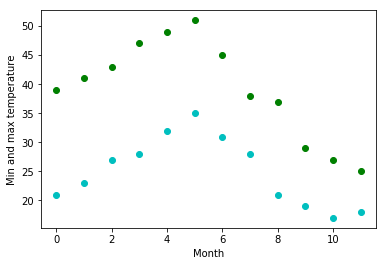

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

1.fitting it to a periodic function

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

2.plotting the fit

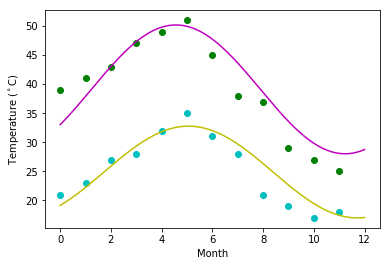

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#2 This assignment is for visualization using matplotlib:
data to use:
url=
https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.cs
v
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [1]:
import pandas as pd
import numpy as np
import os

titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1.Create a pie chart presenting the male/female proportion

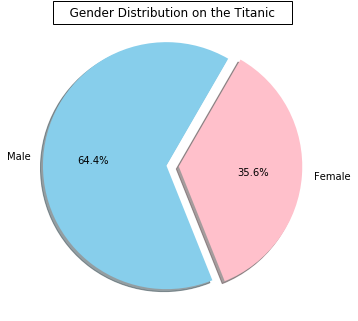

In [3]:
import matplotlib.pyplot as plt
# Gender data based on sex
gender_data = titanic['sex'].value_counts()

# Change the type float
gender_data = gender_data.astype(float)

# set chart vars
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('   Gender Distribution on the Titanic   ', 
             bbox={'facecolor':'white', 'pad':5})
labels = 'Male', 'Female'
colors = ['skyblue', 'pink']
explode = (0.1, 0)
plt.pie(gender_data, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.show()

2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

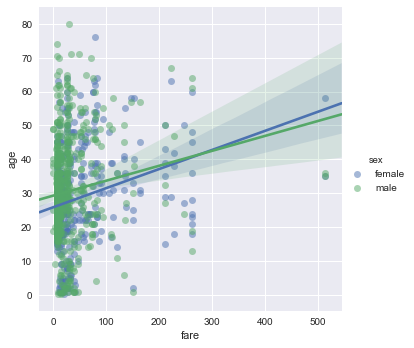

In [4]:
import seaborn as sns

sns.set(style='darkgrid') 

sns.lmplot(x='fare', y='age', data=titanic,
           fit_reg=True, # Show regression line
           hue='sex',    # Color by gender
           scatter_kws={'alpha':0.5}) # use alpha to show concentration